# Carbon Dioxide Emissions by Output vs. Oil Prices in North America

It has been well documented that carbon dioxide(CO2) emissions have increased as the United States industrialized in the 20th century to today. The United States has the world's largest economy and is the 2nd largest emitter of CO2 levels. In this notebook I will analyze the relationship between the United State's CO2 emissions and gross domestic product(GDP)/oil prices. The GDP is the value of all the final goods and services produced by a country. It indicates how much output a country produces in terms of money. I theorize beforehand that as GDP increases so will carbon emissions since the more output is created the more CO2 produced by industries. I also theorize that as oil prices go down CO2 levels will increase since it is cheaper to drive compared to taking public transportation. It will also be cheaper for industies to use oil for their production. I will be seeing if GDP or oil prices have a stronger relationship with CO2 emissions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.special import comb
from scipy.stats import spearmanr

In [3]:
GDP_data = pd.read_csv("totalgdp.csv")
GDP_2010 = pd.read_csv("totalgdp10_20.csv")
print(GDP_data.head())   

   Unnamed: 0                              Years   1947 1947.1 1947.2 1947.3  \
0         NaN                           Quarters     Q1     Q2     Q3     Q4   
1         1.0             Gross domestic product  243.2    246  249.6  259.7   
2         2.0  Personal consumption expenditures  156.2    160  163.5  167.7   
3         3.0                              Goods   95.6   98.2  100.4  103.5   
4         4.0                      Durable goods   20.7   21.4   21.8   23.5   

    1948 1948.1 1948.2 1948.3   ...      2007.3    2008   2008.1   2008.2  \
0     Q1     Q2     Q3     Q4   ...          Q4      Q1       Q2       Q3   
1  265.7  272.6  279.2  280.4   ...     14681.5   14651  14805.6  14835.2   
2  170.4  174.1  177.1  177.9   ...      9877.8  9934.3  10052.8    10081   
3  105.1  107.2  108.7  108.7   ...      3428.2  3406.4   3443.5   3427.9   
4   23.5     24   25.3     25   ...      1195.6  1153.5   1137.7   1095.8   

    2008.3     2009   2009.1   2009.2  2009.3     2010  

**What are the observations (rows) and the attributes (columns)?**
 - The observations are the GDP by industry or sector and the first one is the culmination of all of them: the total GDP. This is only for the United States. The attributes are the years and quarters when each GDP report comes out. A report has been released four times every year since 1947. 
 
**Why was this dataset created?**
 - This was created in order to analyze economic data. The Bureau of Economic Analysis releases reports on the United States progress and analyzes previous economic policies and their results to create new better economic models and policies.  
 
**Who funded the creation of the dataset?**
 - The Bureau of Economic Analysis created this data set. They use past data to create reports which the government uses for new or revised economic policies. The Bureau is a part of the US Department of Commerce. 
 
**What processes might have influenced what data was observed and recorded and what was not?** 
 - GDP measures output of a certain country's industries. Foreign factories inside the US would also be counted as a part of the GDP but domestic firms with factories outside the US would not be counted in this calculation. 

**What preprocessing was done, and how did the data come to be in the form that you are using?**
 - The Bureau's website lets you download the data. However it is filled with empty rows and formatting issues. I used the Numbers application on my computer to get rid of the empty rows and made sure the columns and rows were aligned to their intended value. I exported it as a csv file. In the next block I created a new dataframe with the year and types of GDP as the columns and by year for the rows. This was so I could analyze the data more easily. 
 
**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
 - The data collected was output by industry, not by individuals. These industries are aware of the data collection since the government requests it. They expected the data to be used for economic policy. 
 
**Where can your raw source data be found, if applicable? Provide a link to the raw data.**
 - It can be found on the interactive data page on https://apps.bea.gov/iTable/index_nipa.cfm. It is under the Gross Domestic Product and Personal Income page. It is section 1, table 1.1.5. 


In [4]:
years = 1947.3
US_GDP = []
US_Years = []
US_Service = []
US_Goods = []

for y in range(2010-1947):
    US_GDP.append(float(GDP_data[str(years)][1]))
    US_Service.append(float(GDP_data[str(years)][3]))
    US_Goods.append(float(GDP_data[str(years)][6]))
    years += 1
    
for y2 in range(2020-2010):
    US_GDP.append(float(GDP_2010[str(years)][1]))
    US_Service.append(float(GDP_2010[str(years)][3]))
    US_Goods.append(float(GDP_2010[str(years)][6]))
    years += 1
    
yr = 1947
for d in range(2020-1947):
    US_Years.append(yr)
    yr += 1

USGDP_dict = {"Year" : US_Years, "Total GDP" : US_GDP, "Services" : US_Service, "Goods" : US_Goods}
USGDP = pd.DataFrame(USGDP_dict)
print(USGDP.head())

   Year  Total GDP  Services  Goods
0  1947      259.7     103.5   64.2
1  1948      280.4     108.7   69.3
2  1949      270.6     109.3   70.9
3  1950      319.9     119.9   78.0
4  1951      356.2     125.8   85.7


I created a new dataframe to make analyzing data easier. In this notebook I am only going to analyze total GDP and GDP by goods and services. I am also going to use GDP annually instead of by quarter since my other data sets are also annual. I used the fourth quarter GDP report between 1947 and 2019 as the annual GDP. 

In [5]:
oil_prices = pd.read_csv("bpcrudeoil.csv")
print(oil_prices.head())

         Date  Price in Contemporary Dollars  Price in 2018 Dollars
0  2018-12-31                      71.310060              71.310060
1  2017-12-31                      54.192440              55.516078
2  2016-12-31                      43.734170              45.756816
3  2015-12-31                      52.386759              55.501006
4  2014-12-31                      98.946008             104.952501


**What are the observations (rows) and the attributes (columns)?**
 -  The columns are the date, price in contemporary dollars, and price in 2018 dollars. The date is December 31st, the last day of the year for every year. The oil prices are the average for the year. The rows are the average crude oil price in both 2018 dollars and in the dollar value adjusted for inflation. 
 
**Why was this dataset created?**
 - This was created to document the price of crude oil throughout the years. The creator, BP, created this dataset to publically showcase the price of oil from its inception and allow third parties to use it for their analysis.    
 
**Who funded the creation of the dataset?**
 - This dataset was created by British Petroleum, one of the largest oil companies in the world. 
 
**What processes might have influenced what data was observed and recorded and what was not?**
 - The value of a dollar may have inflated or deflated but the 2nd column takes that into account. The oil price data is only the average data which means there could have been some extreme outliers which may have skewed the data. Using the average oil price is reliable but it may have slight differences than a table with everyday oil prices. 
 
**What preprocessing was done, and how did the data come to be in the form that you are using?**
 - I downloaded the table from a website and I tweaked it in the Numbers application once again so that it would fit together nicely on my notebook. I exported it to my downloads folder as a csv file.  
**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
 - There were no individual people involved in this, just the price of oil determined by supply and demand. Since BP gave the data to a third party website, this data is for the public and third party analyzers. The people calculating the oil prices were in fact aware that this data would be recorded and used for analysis.   
 
**Where can your raw source data be found, if applicable? Provide a link to the raw data.** 
 - I found the raw data on this website: https://www.quandl.com/data/BP/CRUDE_OIL_PRICES-Crude-Oil-Prices-from-1861. 


In [6]:
oil = []
oil_2018 = []
time = []
start = 1900
dec = 118
for ev in range(2019-1900):
    oil.append(oil_prices["Price in Contemporary Dollars"][dec])
    oil_2018.append(oil_prices["Price in 2018 Dollars"][dec])
    time.append(start)
    dec -= 1
    start += 1

oil_dict = {"Year" : time, "Oil Contemporary $" : oil, "Oil 2018 $" : oil_2018}
oil_price = pd.DataFrame(oil_dict)
print(oil_price.head())


   Year  Oil Contemporary $  Oil 2018 $
0  1900                1.19   35.772845
1  1901                0.96   28.858766
2  1902                0.80   23.124011
3  1903                0.94   26.164390
4  1904                0.86   23.937634


Again, I created a new dataframe to hold my data more efficiently for further analysis. I rearranged the data in an increasing order by year so it would go together much better with my other datasets. I limited the time period from 1900-2018. 

In [7]:
co2_emissions = pd.read_csv("co2kt.csv")
print(co2_emissions.head())

  Country Name Country Code      1960      1961      1962      1963      1964  \
0        Aruba          ABW       NaN       NaN       NaN       NaN       NaN   
1  Afghanistan          AFG   414.371   491.378   689.396   707.731   839.743   
2       Angola          AGO   550.050   454.708  1180.774  1151.438  1224.778   
3      Albania          ALB  2024.184  2280.874  2464.224  2082.856  2016.850   
4      Andorra          AND       NaN       NaN       NaN       NaN       NaN   

       1965      1966      1967     ...            2011       2012       2013  \
0       NaN       NaN       NaN     ...        2500.894   1349.456    861.745   
1  1008.425  1092.766  1283.450     ...       12240.446  10755.311  10014.577   
2  1188.108  1554.808   993.757     ...       30340.758  33399.036  32617.965   
3  2174.531  2552.232  2680.577     ...        5240.143   4910.113   5064.127   
4       NaN       NaN       NaN     ...         491.378    487.711    476.710   

        2014  2015  2016  

**What are the observations (rows) and the attributes (columns)?**
 - The observations are each country, economic and geographical regions, and groups of countries by income and developemnt, and their respective carbon dioxide emissions. The attributes are the years recorded from 1960 to 2014.  
 
**Why was this dataset created?**
 - This dataset was created by the World Bank to track the carbon emissions from each country and region. The world bank collects data on hundreds of issues on every country in order to document and analyze data. The dataset was created so analysts and scientists working for the world bank can have easy access to data for every country as well as the public. 
 
**Who funded the creation of the dataset?**
 - I found the data on the website for the World Bank, but it was created by the Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory. The World Bank collected this data from the laboratory and published it separately on its own website. 

**What processes might have influenced what data was observed and recorded and what was not?**
 - There is a lot of missing data labelled as NaN. This is especially true for undeveloped countries or countries at war during a certain time period. Some countries did not start recording data until a certain year. It is also missing data for most countries after 2014. The time period recorded is 1960 to 2014. 
 
**What preprocessing was done, and how did the data come to be in the form that you are using?**
- I downloaded a table from the World Bank website and I used the numbers app to clean up missing/extra rows and columns. I took out several unneeded columns. I exported to my downloads as a csv file. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
 - This was CO2 emissions and did not rely on individual people. However, the lab that did collect this data is aware that people will use this data for future analysis and public use. The World Bank is also aware which is why they published it publically in the first place.  
 
**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).** 
 - I found it on this website: https://data.worldbank.org/indicator/EN.ATM.CO2E.KT?end=2014&start=1960&view=chart. I downloaded the table to my numbers app to clean it up. 

In [11]:
ano = 1960
US_co2 = []

for date in range(2015-1960):
    US_co2.append(co2_emissions[str(ano)].iloc[249])
    ano += 1
    
ano = 1960  
NA_co2 = []

for dat in range(2015-1960):
    NA_co2.append(co2_emissions[str(ano)].iloc[168])
    ano += 1
    
ano = 1960   
HI_co2 = []

for da in range(2015-1960):
    HI_co2.append(co2_emissions[str(ano)].iloc[93])
    ano += 1
    
dates = []
dtz = 1960

for d in range(2015-1960):
    dates.append(dtz)
    dtz +=1
    
emissions_dict = {"Year" : dates, "USA" : US_co2, "North America" : NA_co2, "High Income Countries" : HI_co2}
emissions = pd.DataFrame(emissions_dict)

print(emissions.head())

   Year          USA  North America  High Income Countries
0  1960  2890696.100    3083748.982           5.713366e+06
1  1961  2880505.507    3074863.841           5.838410e+06
2  1962  2987207.873    3194551.054           6.109990e+06
3  1963  3119230.874    3330490.411           6.452882e+06
4  1964  3255995.306    3493998.274           6.782011e+06


I created a new dataframe so I can be more efficient. I switched the columns and rows so that it would be more in line with my other datasets. The columns I chose were the CO2 emissions for the USA, North America, and high income countries. The emissions are recorded in kilotons. 

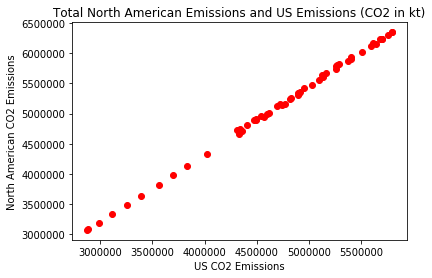

The correlation coefficient for CO2 emissions between the US and North America is 0.9996955649942284 and the 
rank coefficient is 0.998773448773449


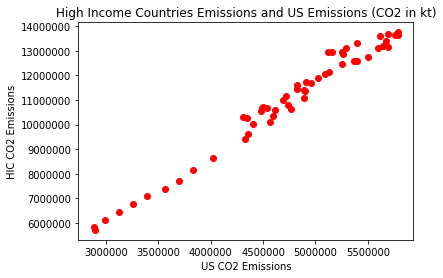

The correlation coefficient for CO2 emissions between the US and HIC is 0.9893051064374387 and the 
rank coefficient is 0.9815295815295818


In [9]:
plt.scatter(emissions['USA'], emissions["North America"], color = "red")
plt.title("Total North American Emissions and US Emissions (CO2 in kt)")
plt.xlabel("US CO2 Emissions")
plt.ylabel("North American CO2 Emissions")
plt.show()

coeff = np.corrcoef(emissions["USA"], emissions["North America"])[0][1]
rank = np.corrcoef(emissions["USA"].rank(), emissions["North America"].rank())[0][1]

print("The correlation coefficient for CO2 emissions between the US and North America is", coeff, "and the \nrank coefficient is", rank)

plt.scatter(emissions['USA'], emissions["High Income Countries"], color = "r")
plt.title("High Income Countries Emissions and US Emissions (CO2 in kt)")
plt.xlabel("US CO2 Emissions")
plt.ylabel("HIC CO2 Emissions")
plt.ticklabel_format(style = 'plain')
plt.show()

coeff2 = np.corrcoef(emissions["USA"], emissions["High Income Countries"])[0][1]
rank2 = np.corrcoef(emissions["USA"].rank(), emissions["High Income Countries"].rank())[0][1]

print("The correlation coefficient for CO2 emissions between the US and HIC is", coeff2, "and the \nrank coefficient is", rank2)

**US CO2 Influence on North American and Developed Countries**

A high income country is defined by the World Bank as country with a gross national income that is higher than $12,056. The correlation between the CO2 emissions created by the United States and North America is nearly identical. The coefficient is very high between the US and HIC. The coefficients are also very close to 1 (perfect positive correlation) for both graphs. One conclusion we can draw from this is that the influence of American CO2 emissions is extremely high in both North America and HIC. However, the US emissions only accounts for a third of the raw value of emissions in kt of HIC. So while the US does play a large role in the CO2 emissions in HIC, another factor in this correlation is that most other HIC countries also increased CO2 emissions as time went on from 1960. However, it is evident that the US is behind most of the emissions for North America even if Canada and Mexico's emissions also increased.  

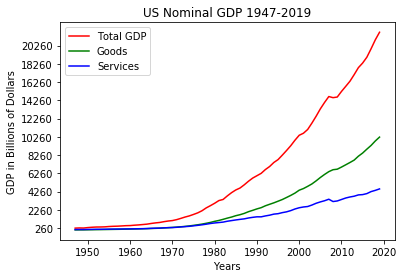

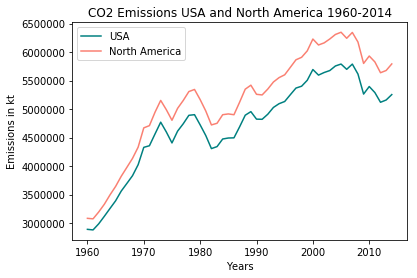

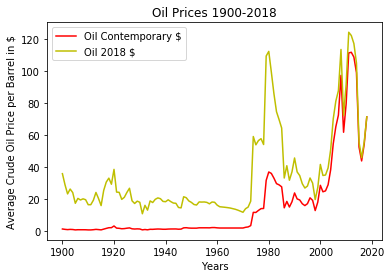

In [336]:
plt.plot(USGDP["Year"], USGDP["Total GDP"], color = "red")
plt.plot(USGDP["Year"], USGDP["Goods"], color = "green")
plt.plot(USGDP["Year"], USGDP["Services"], color = "blue")
plt.yticks(np.arange(USGDP["Total GDP"].min(), USGDP["Total GDP"].max(), 2000))
plt.legend(loc="upper left")
plt.title("US Nominal GDP 1947-2019")
plt.xlabel("Years")
plt.ylabel("GDP in Billions of Dollars")
plt.show()
plt.plot

plt.plot(emissions["Year"], emissions["USA"], color = "teal")
plt.plot(emissions["Year"], emissions["North America"], color = "salmon")
plt.legend(loc="upper left")
plt.title("CO2 Emissions USA and North America 1960-2014")
plt.xlabel("Years")
plt.ylabel("Emissions in kt")
plt.show()

plt.plot(oil_price["Year"], oil_price["Oil Contemporary $"], color = "r")
plt.plot(oil_price["Year"], oil_price["Oil 2018 $"], color = "y")
plt.legend(loc="upper left")
plt.title("Oil Prices 1900-2018")
plt.xlabel("Years")
plt.ylabel("Average Crude Oil Price per Barrel in $")
plt.show()

**US GDP:**

The total GDP for the United States has been increasing quickly since 1947. Goods and services as a part of GDP were very close to each other until the 1980s where they split apart with goods producing more GDP in billions of dollars. 

**North American CO2 Emissions:**

Both of the emissions lines for the USA and North America seem to mirror each other closely. This can easily be explained because the United States produces the second most CO2 in the world. Its large influence is evident by how similiar the two graphs look to each other. 

**Crude Oil Prices:**

The oil prices chart is interesting because the oil prices adjusted to 2018 dollars show a different story than oil prices by contemporary prices. Both of them come together closer as they each 2018 and the effects of inflation wane. But in the first half every small disturbance in the line of contemporary oil prices can be seen as a larger disturbance by the line of oil prices using 2018 dollars. Using oil prices by 2018 dollars would probably be more accurate since it is adjusted for inflation.

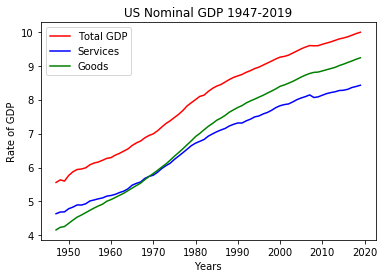

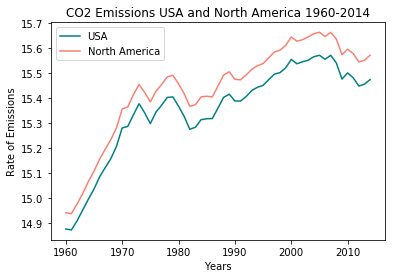

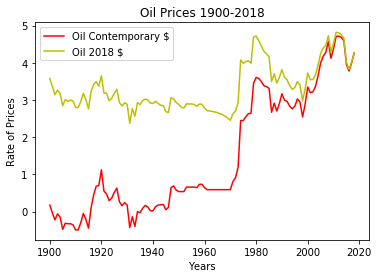

In [10]:
log_gdp = []
log_service = []
log_goods = []

log_oil1 = []
log_oil2 = []

log_us = []
log_na = []

for x1 in range(len(USGDP["Total GDP"])):
    log_gdp.append(np.log(float(USGDP["Total GDP"][x1])))
    log_service.append(np.log(float(USGDP["Services"][x1])))
    log_goods.append(np.log(float(USGDP["Goods"][x1])))

for x2 in range(len(oil_price["Oil 2018 $"])):
    log_oil1.append(np.log(float(oil_price["Oil 2018 $"][x2])))
    log_oil2.append(np.log(float(oil_price["Oil Contemporary $"][x2])))

for x3 in range(len(emissions["USA"])):
    log_us.append(np.log(float(emissions["USA"][x3])))
    log_na.append(np.log(float(emissions["North America"][x3])))
    
plt.plot(USGDP["Year"], log_gdp, color = 'r', label = "Total GDP")
plt.plot(USGDP["Year"], log_service, color = 'b', label = "Services")
plt.plot(USGDP["Year"], log_goods, color = 'g', label = "Goods")
plt.legend(loc="upper left", )
plt.title("US Nominal GDP 1947-2019")
plt.xlabel("Years")
plt.ylabel("Rate of GDP")
plt.show()

plt.plot(emissions["Year"], log_us, color = 'teal', label = "USA")
plt.plot(emissions["Year"], log_na, color = 'salmon', label = "North America")
plt.legend(loc="upper left")
plt.title("CO2 Emissions USA and North America 1960-2014")
plt.xlabel("Years")
plt.ylabel("Rate of Emissions")
plt.show()

plt.plot(oil_price["Year"], log_oil2, color = 'r', label = "Oil Contemporary $")
plt.plot(oil_price["Year"], log_oil1, color = 'y', label = "Oil 2018 $")
plt.legend(loc="upper left")
plt.title("Oil Prices 1900-2018")
plt.xlabel("Years")
plt.ylabel("Rate of Prices")
plt.show()
    
    
    

In this section I used logarithms to better show percent change and identify any other patterns. A lot of the values I used were extremely large so I thought this would be a good fit. 

**US GDP:**

The total US GDP is indicitative of exponential growth. The GDP of goods appears to follow a very similiar slope. The growth rate of goods of a part of GDP surpasses services around the late 1960s and early 1970s. This is very interesting because this time period was known for the decline of the manufacturing industry. But it seems like this is when final goods created produced more output in terms of dollars than service.    

**North American CO2 Emissions:**

Both of the emissions lines for the USA and North America seem to mirror each other closely again. The main reason being that the US emissions (and GDP) make a significant fraction of all of North America.  

**Crude Oil Prices:**

Again, the two lines close in on each other as they get closer to 2018. Adjusted for inflation (2018 $), oil prices have much less impressive growth from 1900 to 2018. That "growth" in the graph can be attributed to inflation. 

The Great Recession (2007-2009)


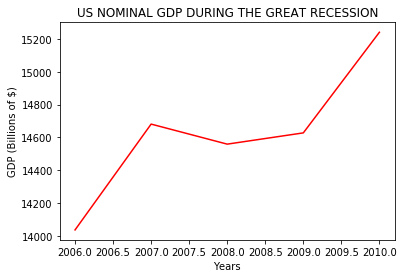

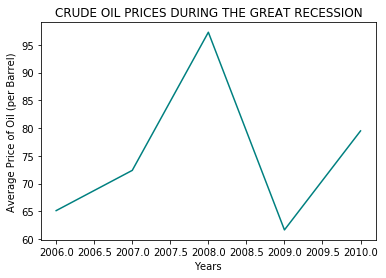

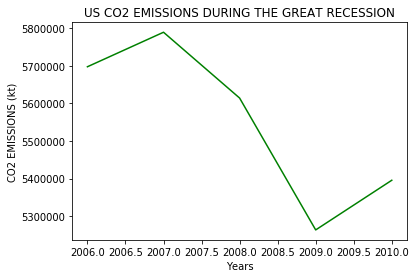

In [341]:
print("The Great Recession (2007-2009)")

ears = []

for un in range(5):
    ears.append(un + 2006)
    
plt.plot(ears, USGDP["Total GDP"][59:64], color = 'r')
plt.title("US NOMINAL GDP DURING THE GREAT RECESSION")
plt.xlabel("Years")
plt.ylabel("GDP (Billions of $)")
plt.show()

plt.plot(ears, oil_price["Oil Contemporary $"][106:111], color = 'teal')
plt.title("CRUDE OIL PRICES DURING THE GREAT RECESSION")
plt.xlabel("Years")
plt.ylabel("Average Price of Oil (per Barrel)")
plt.show()

plt.plot(ears, emissions["USA"][46:51], color = 'g')
plt.title("US CO2 EMISSIONS DURING THE GREAT RECESSION")
plt.xlabel("Years")
plt.ylabel("CO2 EMISSIONS (kt)")
plt.show()

On the surface it may appear that the Great Recession caused a decline in GDP, oil prices, and CO2 emissions all at once. But it is unclear if the drop in CO2 was a result of the drop in oil prices of GDP, or both. There are only five points in these graphs, so the conclusions gathered analyzing this may be inaccurate so I used the time frame from 1960 to 2014 instead. 

In [16]:
print("CO2 EMISSIONS AND GDP:")

place = []
holder = []
pl = []
hr = []

for x4 in range(2015-1960):
    place.append(USGDP["Total GDP"][x4 + 13])
    holder.append(emissions["USA"][x4])
    pl.append(USGDP["Services"][x4])
    hr.append(USGDP["Goods"][x4])
   
gdpco2 = pd.DataFrame({"GDP" : place, "EMISSIONS" : holder, "GOODS" : hr, "SERVICES" : pl})

print("\n\nMean GDP:   $" , round(gdpco2["GDP"].mean()), "Billion")
print("Median GDP: $" , round(gdpco2["GDP"].median()), "Billion")
print("Standard Deviation: $", round(np.std(gdpco2["GDP"])), "Billion")
print("Variance: $", round(np.var(gdpco2["GDP"])), "Billion")
print("\nMean Emissions:" , round(gdpco2["EMISSIONS"].mean()), "kt")
print("Median Emissions: $" , round(gdpco2["EMISSIONS"].median()), "kt")
print("Standard Deviation: $", round(np.std(gdpco2["EMISSIONS"])), "kt")
print("Variance: $", round(np.var(gdpco2["EMISSIONS"])), "kt")

CO2 EMISSIONS AND GDP:


Mean GDP:   $ 6466 Billion
Median GDP: $ 5008 Billion
Standard Deviation: $ 5332 Billion
Variance: $ 28427181 Billion

Mean Emissions: 4723442 kt
Median Emissions: $ 4823403 kt
Standard Deviation: $ 780617 kt
Variance: $ 609362994284 kt


The main thing that stood out was the large standard deviation and variance for GDP. This is due to the fact that GDP increased exponentially from the 1940s to current day. While the mean and median are insightful figures they are not that valuable in comparing the relationship between CO2 emissions and GDP yet. 

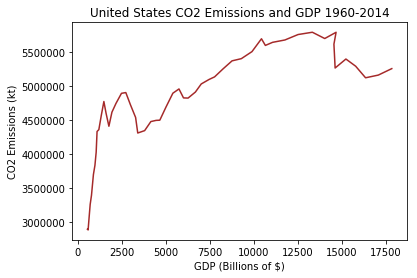

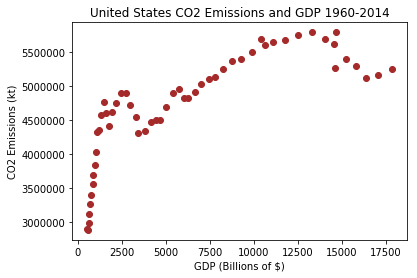

Correlation: 0.7865564370186544
Rank/Spearman Correlation: 0.9063492063492066
The slope of the linear regression is: 115.15983316405426
The intercept of the linear regression is: 3978815.4001297136
The r^2 value of emissions given GDP is: 0.6186710286154812


In [12]:
plt.plot(gdpco2["GDP"], gdpco2["EMISSIONS"], color = "brown")
plt.title("United States CO2 Emissions and GDP 1960-2014")
plt.xlabel("GDP (Billions of $)")
plt.ylabel("CO2 Emissions (kt)")
plt.show()

plt.scatter(gdpco2["GDP"], gdpco2["EMISSIONS"], color = "brown")
plt.title("United States CO2 Emissions and GDP 1960-2014")
plt.xlabel("GDP (Billions of $)")
plt.ylabel("CO2 Emissions (kt)")
plt.show()

cf = np.corrcoef(gdpco2["GDP"], gdpco2["EMISSIONS"])[0][1]
rank_cf = np.corrcoef(gdpco2["GDP"].rank(), gdpco2["EMISSIONS"].rank())[0][1]

print("Correlation:", cf)
print("Rank/Spearman Correlation:", rank_cf)

model1 = LinearRegression()
model1.fit(gdpco2[["GDP"]], gdpco2["EMISSIONS"])

print("The slope of the linear regression is:", model1.coef_[0])
print("The intercept of the linear regression is:", model1.intercept_)
print("The r^2 value of emissions given GDP is:", model1.score(gdpco2[["GDP"]], gdpco2["EMISSIONS"]))

There appears to be a strong correlation between CO2 emissions from the United States and its GDP. When I used the rank/Spearman correlation to account for the monotonic relationship the association becomes more evident. The Spearman correlation is close to 1 (a perfect relationship). As GDP increased so did emissions. The r^2 value also indicates a relationship between the two. The value is large and it means that the model can explain the variation around the mean very well.  

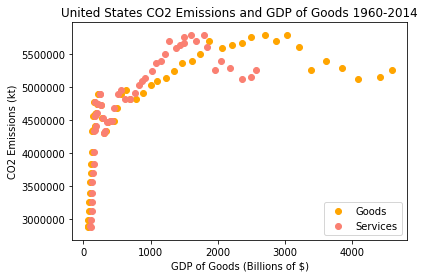

Goods and CO2 Emission Correlation: 0.6817940920891122
Services and CO2 Emission Correlation: 0.7254632187797874
Goods and CO2 Emission Rank Correlation: 0.9049783549783552
Services and CO2 Emission Rank Correlation: 0.9046897546897549
The r^2 value of emissions given GDP of Goods is: 0.4648431840076168
The r^2 value of emissions given GDP of Services is: 0.5262968818023299


In [13]:
plt.scatter(gdpco2["GOODS"], gdpco2["EMISSIONS"], color = "orange", label = "Goods")
plt.scatter(gdpco2["SERVICES"], gdpco2["EMISSIONS"], color = "salmon", label = "Services")
plt.title("United States CO2 Emissions and GDP of Goods 1960-2014")
plt.xlabel("GDP of Goods (Billions of $)")
plt.ylabel("CO2 Emissions (kt)")
plt.legend(loc = "lower right")
plt.show()

coef = np.corrcoef(gdpco2["GOODS"], gdpco2["EMISSIONS"])[0][1]
rcf = np.corrcoef(gdpco2["GOODS"].rank(), gdpco2["EMISSIONS"].rank())[0][1]

coef2 = np.corrcoef(gdpco2["SERVICES"], gdpco2["EMISSIONS"])[0][1]
rcf2 = np.corrcoef(gdpco2["SERVICES"].rank(), gdpco2["EMISSIONS"].rank())[0][1]

print("Goods and CO2 Emission Correlation:", coef)
print("Services and CO2 Emission Correlation:", coef2)
print("Goods and CO2 Emission Rank Correlation:", rcf)
print("Services and CO2 Emission Rank Correlation:", rcf2)

modelg = LinearRegression()
modelg.fit(gdpco2[["GOODS"]], gdpco2["EMISSIONS"])
models = LinearRegression()
models.fit(gdpco2[["SERVICES"]], gdpco2["EMISSIONS"])

print("The r^2 value of emissions given GDP of Goods is:", modelg.score(gdpco2[["GOODS"]], gdpco2["EMISSIONS"]))
print("The r^2 value of emissions given GDP of Services is:", models.score(gdpco2[["SERVICES"]], gdpco2["EMISSIONS"]))

GDP from services has a slightly stronger correlation, however both services and goods have nearly identical rank correlations. Their rank correlation is a strong indication of a relationship. However, their r^2 values are not as high as total GDP. This may because the relationship is more exponential than linear. 

In [15]:
print("CO2 EMISSIONS AND OIL PRICES")

place1 = []
holder1 = []

for x5 in range(2015-1960):
    place1.append(oil_price["Oil 2018 $"][x5 + 60])
    holder1.append(emissions["USA"][x5])
    
oilco2 = pd.DataFrame({"OIL" : place1, "EMISSIONS" : holder1})

print("\nMean Oil Price:   $" , round(oilco2["OIL"].mean(), 2))
print("Median Oil Price: $" , round(oilco2["OIL"].median(), 2))
print("Standard Deviation: $", round(np.std(oilco2["OIL"]),2))
print("Variance: $", round(np.var(oilco2["OIL"]), 2))

CO2 EMISSIONS AND OIL PRICES

Mean Oil Price:   $ 49.76
Median Oil Price: $ 36.91
Standard Deviation: $ 33.87
Variance: $ 1147.14


The main thing that stood out here was that the standard deviation for oil prices was high compared to the mean and median. Oil prices must have been volatile in the last century. I used oil in 2018 dollars in this analysis to account for inflation. 

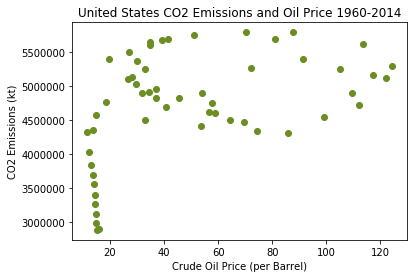

Correlation: 0.45603134645241233
Rank Correlation: 0.49119769119769124
The slope of the linear regression is: 10510.542073185374
The intercept of the linear regression is: 4200469.956264106
The r^2 value of emissions given oil price is: 0.20796458894720027


In [16]:
plt.scatter(oilco2["OIL"], oilco2["EMISSIONS"], color = "olivedrab")
plt.title("United States CO2 Emissions and Oil Price 1960-2014")
plt.xlabel("Crude Oil Price (per Barrel)")
plt.ylabel("CO2 Emissions (kt)")
plt.show()

cf2 = np.corrcoef(oilco2["OIL"], oilco2["EMISSIONS"])[0][1]
rank_cf2 = np.corrcoef(oilco2["OIL"].rank(), oilco2["EMISSIONS"].rank())[0][1]

print("Correlation:", cf2)
print("Rank Correlation:", rank_cf2)

model2 = LinearRegression()
model2.fit(oilco2[["OIL"]], oilco2["EMISSIONS"])

print("The slope of the linear regression is:", model2.coef_[0])
print("The intercept of the linear regression is:", model2.intercept_)
print("The r^2 value of emissions given oil price is:", model2.score(oilco2[["OIL"]], oilco2["EMISSIONS"]))

The correlation and rank correlation are close to each other. There appears to be a very weak relationship if any. The r^2 value is also very low to the point that the model indicates that there really is not a relationship. The correlation is less reliable and can have occured through chance. I will explore this later. 

OIL PRICES AND US GDP


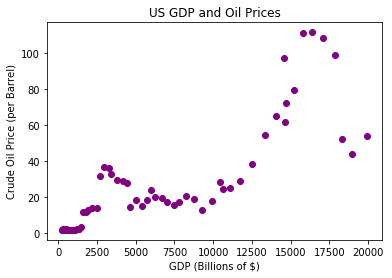

Correlation: 0.8466113928364356
Rank Correlation: 0.8888638270042665
The slope of the linear regression is: 0.004154271155015667
The intercept of the linear regression is: 0.12672985623430577
The r^2 value of emissions given GDP is: 0.7167508504804494


In [769]:
print("OIL PRICES AND US GDP")

place2 = []
holder2 = []

for x5 in range(2018-1947):
    place2.append(oil_price["Oil Contemporary $"][x5 + 47])
    holder2.append(USGDP["Total GDP"][x5])
    
gdpoil = pd.DataFrame({"OIL" : place2, "GDP" : holder2})

plt.scatter(gdpoil["GDP"], gdpoil["OIL"], color = "purple")
plt.title("US GDP and Oil Prices")
plt.xlabel("GDP (Billions of $)")
plt.ylabel("Crude Oil Price (per Barrel)")
plt.show()

model3 = LinearRegression()
model3.fit(gdpoil[["GDP"]], gdpoil["OIL"])

cf0 = np.corrcoef(gdpoil["GDP"], gdpoil["OIL"])[0][1]
rank_cf0 = np.corrcoef(gdpoil["GDP"].rank(), gdpoil["OIL"].rank())[0][1]

print("Correlation:", cf0)
print("Rank Correlation:", rank_cf0)

print("The slope of the linear regression is:", model3.coef_[0])
print("The intercept of the linear regression is:", model3.intercept_)
print("The r^2 value of emissions given GDP is:", model3.score(gdpoil[["GDP"]], gdpoil["OIL"]))

It would seem like there is a strong correlation between US GDP and oil prices. The r^2 value is also high and could possibly mean that this model is right. The slope and intercept are not very useful(at first glance) in the bigger picture because the units are very different in size and meaning. 

OIL PRICES AND US GDP (ADJUSTED)


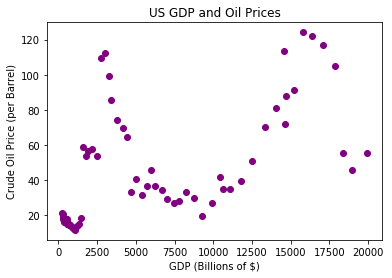

Correlation: 0.6022181640035859
Rank Correlation: 0.6964453386988597
The slope of the linear regression is: 0.003274413870873771
The intercept of the linear regression is: 24.804536684317537
The r^2 value of emissions given GDP is: 0.3626667170558495


In [768]:
print("OIL PRICES AND US GDP (ADJUSTED)")

place0 = []
holder0 = []

for x6 in range(2018-1947):
    place0.append(oil_price["Oil 2018 $"][x6 + 47])
    holder0.append(USGDP["Total GDP"][x6])
    
gdpoil2 = pd.DataFrame({"OIL" : place0, "GDP" : holder0})

plt.scatter(gdpoil2["GDP"], gdpoil2["OIL"], color = "purple")
plt.title("US GDP and Oil Prices")
plt.xlabel("GDP (Billions of $)")
plt.ylabel("Crude Oil Price (per Barrel)")
plt.show()

model40 = LinearRegression()
model40.fit(gdpoil2[["GDP"]], gdpoil2["OIL"])

cf01 = np.corrcoef(gdpoil2["GDP"], gdpoil2["OIL"])[0][1]
rank_cf01 = np.corrcoef(gdpoil2["GDP"].rank(), gdpoil2["OIL"].rank())[0][1]

print("Correlation:", cf01)
print("Rank Correlation:", rank_cf01)

print("The slope of the linear regression is:", model40.coef_[0])
print("The intercept of the linear regression is:", model40.intercept_)
print("The r^2 value of emissions given GDP is:", model40.score(gdpoil2[["GDP"]], gdpoil2["OIL"]))

After I adjusted the oil prices for inflation, the correlations and r^2 value both became weaker. While the correlation is still strong, the r^2 appears to indicate that this model does not fit the data as well as I previously thought. Both these graphs do indirectly indicate high inflation.

The mean of emissions from the USA is: 4723442 kt
The standard deviation of emissions from the USA is: 787812 kt


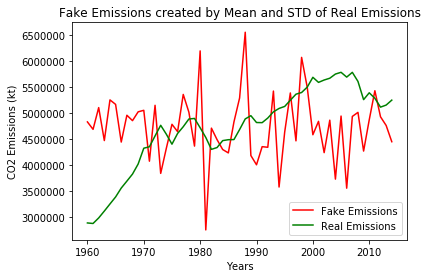

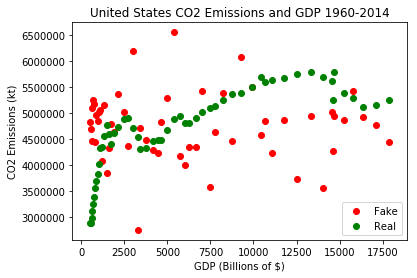

Correlation: -0.027164883767460925
Rank/Spearman Correlation: -0.06277056277056278
The slope of the linear regression is: -3.2904391055305235
The intercept of the linear regression is: 4755519.665593067
The r^2 value of emissions given GDP is: 0.0007379309100999931


In [770]:
print("The mean of emissions from the USA is:", round(emissions["USA"].mean()), "kt")
print("The standard deviation of emissions from the USA is:", round(emissions["USA"].std()), "kt")

fake_emissions = np.random.normal(loc = emissions["USA"].mean(), scale = emissions["USA"].std(), size = len(emissions["USA"]))

plt.plot(emissions["Year"], fake_emissions, label = "Fake Emissions", color = "red")
plt.plot(emissions["Year"], emissions["USA"], label = "Real Emissions", color = "green")
plt.title("Fake Emissions created by Mean and STD of Real Emissions")
plt.ylabel("CO2 Emissions (kt)")
plt.xlabel("Years")
plt.legend(loc = "lower right")
plt.show()

plt.scatter(gdpco2["GDP"], fake_emissions, color = "red", label = "Fake")
plt.scatter(gdpco2["GDP"], gdpco2["EMISSIONS"], color = "green", label = "Real")
plt.legend(loc = "lower right")
plt.title("United States CO2 Emissions and GDP 1960-2014")
plt.xlabel("GDP (Billions of $)")
plt.ylabel("CO2 Emissions (kt)")
plt.show()

f_e = pd.DataFrame({"EMISSIONS" : fake_emissions})

c_ = np.corrcoef(gdpco2["GDP"], fake_emissions)[0][1]
rf1 = np.corrcoef(gdpco2["GDP"].rank(), f_e["EMISSIONS"].rank())[0][1]

print("Correlation:", c_)
print("Rank/Spearman Correlation:", rf1)

model_ = LinearRegression()
model_.fit(gdpco2[["GDP"]], f_e["EMISSIONS"])

print("The slope of the linear regression is:", model_.coef_[0])
print("The intercept of the linear regression is:", model_.intercept_)
print("The r^2 value of emissions given GDP is:", model_.score(gdpco2[["GDP"]], f_e["EMISSIONS"]))   

There is a large contingent of people who deny climate change and believe that the data does not show a link between output/industrialization and CO2 emissions. In this part I created a dataset of fake emissions by creating a normal distribution with the mean and standard deviation of the real emission dataset. The fake dataset has almost no correlation and the little bit it has is negative unlike the real dataset. The r^2 also shows that this fake model does not explain any of the variation around the mean. This further legitimizes the strong relationship between GDP and CO2 emissions.

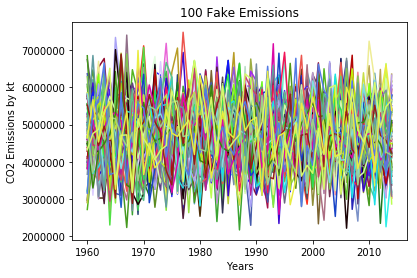

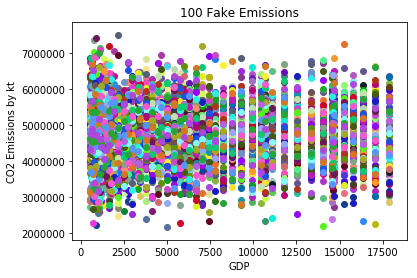

The highest correlation in 100 fake samples to GDP is: 0.27530417189360323
The highest rank correlation in 100 fake samples to GDP is: 0.2687590187590188
The highest correlation in 10000 fake samples to GDP is: 0.42185492963767274
The highest rank correlation in 10000 fake samples to GDP is: 0.45555555555555566


In [433]:
fake = []

for value in range(100):
    fake.append(np.random.normal(loc = emissions["USA"].mean(), scale = emissions["USA"].std(), size = len(emissions["USA"])))
    plt.plot(emissions["Year"], fake[value], color = np.random.rand(3,))
    
plt.title("100 Fake Emissions")
plt.xlabel("Years")
plt.ylabel("CO2 Emissions by kt")
plt.show()

for aunit in range(100):
    plt.scatter(gdpco2["GDP"], fake[aunit], color = np.random.rand(3,))
    
plt.title("100 Fake Emissions")
plt.xlabel("GDP")
plt.ylabel("CO2 Emissions by kt")
plt.show()

highest_c = 0
highest_r = 0

for r in range(100):
    new_c = np.corrcoef(gdpco2["GDP"], fake[r])[0][1]
    fe = pd.DataFrame({"EMISSIONS" : fake[r]})
    new_r = np.corrcoef(gdpco2["GDP"].rank(), fe["EMISSIONS"].rank())[0][1]
    if(new_c > highest_c):
        highest_c = new_c
    if(new_r > highest_r):
        highest_r = new_r
    
print("The highest correlation in 100 fake samples to GDP is:", highest_c) 
print("The highest rank correlation in 100 fake samples to GDP is:", highest_r) 

fake1 = []
highest_c2 = 0
highest_r2 = 0

for value in range(10000):
    fake1 = (np.random.normal(loc = emissions["USA"].mean(), scale = emissions["USA"].std(), size = len(emissions["USA"])))
    new_c2 = np.corrcoef(gdpco2["GDP"], fake1)[0][1]
    fake2 = pd.DataFrame({"EMISSIONS" : fake1})
    new_r2 = np.corrcoef(gdpco2["GDP"].rank(), fake2["EMISSIONS"].rank())[0][1]
    if(new_r2 > highest_r2):
        highest_r2 = new_r2
    if(new_c2 > highest_c2):
        highest_c2 = new_c2
        
print("The highest correlation in 10000 fake samples to GDP is:", highest_c2) 
print("The highest rank correlation in 10000 fake samples to GDP is:", highest_r2) 



I tried finding the correlation and rank correlation for a 100 and 10000 fake emission datasets created by the mean and standard deviation of the real emissions dataset. None of them were higher than 0.5. The correlation for the real emissions dataset is 0.78 and the rank correlation is 0.90. It is clear that CO2 emissions are not random compared to GDP. If they were, it would have been a very astronomical chance. 

In [15]:
top_c = 0
top_r = 0

for base in range(10000):
    f1 = (np.random.normal(loc = emissions["USA"].mean(), scale = emissions["USA"].std(), size = len(emissions["USA"])))
    n_c = np.corrcoef(emissions["USA"], f1)[0][1]
    f2 = pd.DataFrame({"EMISSIONS" : f1})
    n_r = np.corrcoef(emissions["USA"].rank(), f2["EMISSIONS"].rank())[0][1]
    if(n_r > top_r):
        top_r = n_r
    if(n_c > top_c):
        top_c = n_c
        
print("The highest correlation in 10000 fake samples to real emissions is:", top_c) 
print("The highest rank correlation in 10000 fake samples to real emissions is:", top_r)
    
    

The highest correlation in 10000 fake samples to real emissions is: 0.47934755759341957
The highest rank correlation in 10000 fake samples to real emissions is: 0.528932178932179


In this I compared the fake emissions to real emissions. Again both the correlations do not rise past 0.50. It becomes more and more likely that GDP does impact emissions. The fake samples are no way similar to the real dataset.

The mean oil price is: $ 49.76
The standard deviation of oil prices is: $ 34.18


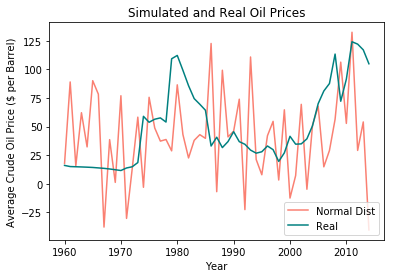

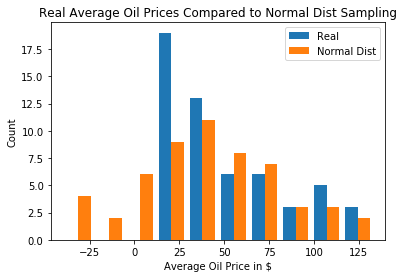

The correlation between real and fake oil prices is: -0.027724162814853872


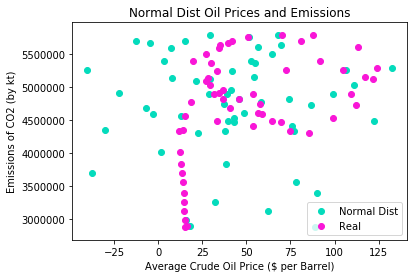

The highest correlation in 10000 fake oil samples to emissions is: 0.3058259009925603
The highest rank correlation in 10000 oil fake samples to emissions is: 0.35916305916305924


In [781]:
print("The mean oil price is: $", round(oilco2["OIL"].mean(), 2))
print("The standard deviation of oil prices is: $", round(oilco2["OIL"].std(), 2))

fake_oil = []
new_yr = []

for plhr in range(2015-1960):
    new_yr.append(plhr + 1960)

for value in range(10000):
    fake_oil.append(np.random.normal(loc = oilco2["OIL"].mean(), scale = oilco2["OIL"].std(), size = len(oilco2["OIL"])))
    
plt.plot(new_yr, fake_oil[0], color = "salmon", label = "Normal Dist")
plt.plot(new_yr, oilco2["OIL"], color = "teal", label = "Real")
plt.legend(loc = "lower right")
plt.xlabel("Year")
plt.ylabel("Average Crude Oil Price ($ per Barrel)")
plt.title("Simulated and Real Oil Prices")
plt.show()

roundedo = []
roundedn = []

for barrel in range(len(oilco2["OIL"])):
    roundedo.append(round(oilco2["OIL"][barrel]))
    roundedn.append(round(fake_oil[0][barrel]))
    
plt.hist((roundedo, roundedn), bins = 10, label = ("Real", "Normal Dist"))
plt.title("Real Average Oil Prices Compared to Normal Dist Sampling")
plt.xlabel("Average Oil Price in $")
plt.ylabel("Count")
plt.legend(loc = "upper right")
plt.show()

print("The correlation between real and fake oil prices is:", np.corrcoef(oilco2["OIL"], fake_oil[i])[0][1])
    
plt.scatter(fake_oil[0], emissions["USA"], color = np.random.rand(3,), label = "Normal Dist")
plt.scatter(oilco2["OIL"], emissions["USA"], color = np.random.rand(3,), label = "Real")
plt.title("Normal Dist Oil Prices and Emissions")
plt.ylabel("Emissions of CO2 (by kt)")
plt.xlabel("Average Crude Oil Price ($ per Barrel)")
plt.legend( loc = "lower right")
plt.show()

corr = 0
rank = 0

for i in range(100):
    new_corr = np.corrcoef(emissions["USA"], fake_oil[i])[0][1]
    op = pd.DataFrame({"OIL" : fake_oil[i]})
    new_rank = np.corrcoef(emissions["USA"].rank(), op["OIL"].rank())[0][1]
    if(new_corr > corr):
        corr = new_corr
    if(new_rank > rank):
        rank = new_rank
    
print("The highest correlation in 10000 fake oil samples to emissions is:", corr) 
print("The highest rank correlation in 10000 oil fake samples to emissions is:", rank)




There is also little to no correlation between a randomly generated dataset of oil prices (using the mean and standard deviation of the real oil price dataset), and the real oil price dataset. The correlations between a normal distribution of fake oil prices and CO2 emissions is very weak but it is close to the real dataset. There is a good possibility that oil prices are not related to CO2 emissions. 

In the histogram, we can see that most real prices were around $25-50. The fake dataset had negative values unlike the real dataset. If I had access to todays data this would have been false because the oil price went below zero a few weeks ago in real life. 

Oil prices are not random but normal distribution datasets created randomly using the mean and standard deviation of the real dataset has a similar correlation to emissions as the real dataset. This leads to believe that there is not a relationship or a very weak relationship between oil prices and carbon emissions.  

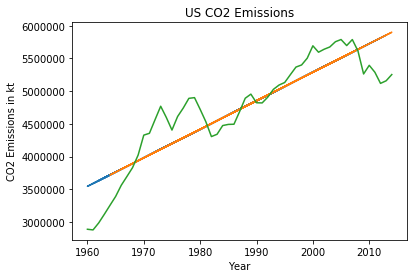

r^2 value is: 0.794702882965441
r^2 value is: 0.7537060126628261


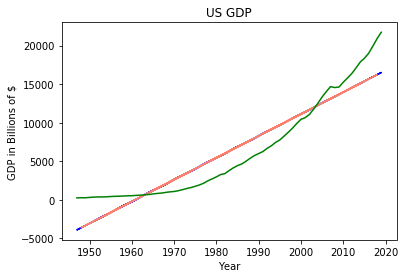

r^2 value is: 0.8591991639570924
r^2 value is: 0.8896939341896908


In [13]:
predictive_model = LinearRegression().fit(emissions[["Year"]], emissions["USA"])

dx = np.random.permutation(np.arange(len(emissions["Year"])))

e1 = emissions["Year"][dx[0:40]].values.reshape(-1, 1)
p1 = emissions["USA"][dx[0:40]]
e2 = emissions["Year"][dx[40:]].values.reshape(-1, 1)
p2 = emissions["USA"][dx[40:]]

plt.plot(e1, predictive_model.predict(e1))
plt.plot(e2, predictive_model.predict(e2))
plt.plot(emissions["Year"], emissions["USA"])
plt.title("US CO2 Emissions")
plt.ylabel("CO2 Emissions in kt")
plt.xlabel("Year")
plt.show()

print("r^2 value is:", predictive_model.score(e1, p1))
print("r^2 value is:", predictive_model.score(e2, p2))

predictive_model2 = LinearRegression().fit(USGDP[["Year"]], USGDP["Total GDP"])

dx2 = np.random.permutation(np.arange(len(USGDP["Year"])))

e12 = USGDP["Year"][dx2[0:40]].values.reshape(-1, 1)
p12 = USGDP["Total GDP"][dx2[0:40]]
e22 = USGDP["Year"][dx2[40:]].values.reshape(-1, 1)
p22 = USGDP["Total GDP"][dx2[40:]]

plt.plot(e12, predictive_model2.predict(e12), color = "blue")
plt.plot(e22, predictive_model2.predict(e22), color = "salmon")
plt.plot(USGDP["Year"], USGDP["Total GDP"], color = "green")
plt.title("US GDP")
plt.xlabel("Year")
plt.ylabel("GDP in Billions of $")
plt.show()

print("r^2 value is:", predictive_model2.score(e12, p12))
print("r^2 value is:", predictive_model2.score(e22, p22))






Both datasets have a strong linear regression and a high r^2 value for similar time periods. The test data has lower scores than the training data but they are still strong. There is a good chance of a linear relationship between CO2 emissions, GDP and the time frame.  

In [33]:
k = 5

GDP_CO2 = []
test_val = []
trained_val = []

shuffled = gdpco2.sample(n = len(gdpco2["GDP"]))
shuffled.reset_index(drop = True, inplace = True)

for lav in range(len(gdpco2["GDP"])):
    GDP_CO2.append([shuffled["GDP"][lav], shuffled["EMISSIONS"][lav]])
print("TRAINED:")
both = np.asarray(GDP_CO2)
splits = np.array_split(both, k)

x_val = np.concatenate([splits[0][:,0], splits[1][:,0], splits[2][:,0], splits[3][:,0]]).reshape(-1, 1)
y_val = np.concatenate([splits[0][:,1], splits[1][:,1], splits[2][:,1], splits[3][:,1]])

model_0 = LinearRegression().fit(x_val, y_val)
trained_val.append(model_0.score(x_val, y_val))   

print(model_0.score(x_val, y_val))    
test_val.append(model_0.score(splits[4][:,0].reshape(-1, 1), splits[4][:,1]) )

x_val = np.concatenate([splits[1][:,0], splits[2][:,0], splits[3][:,0], splits[4][:,0]]).reshape(-1, 1)
y_val = np.concatenate([splits[1][:,1], splits[2][:,1], splits[3][:,1], splits[4][:,1]])

model_1 = LinearRegression().fit(x_val, y_val)
trained_val.append(model_1.score(x_val, y_val))   

print(model_1.score(x_val, y_val))    
test_val.append(model_1.score(splits[0][:,0].reshape(-1, 1), splits[0][:,1]) )

x_val = np.concatenate([splits[2][:,0], splits[3][:,0], splits[4][:,0], splits[0][:,0]]).reshape(-1, 1)
y_val = np.concatenate([splits[2][:,1], splits[3][:,1], splits[4][:,1], splits[0][:,1]])

model_2 = LinearRegression().fit(x_val, y_val)
trained_val.append(model_2.score(x_val, y_val))   


print(model_2.score(x_val, y_val))    
test_val.append(model_2.score(splits[1][:,0].reshape(-1, 1), splits[1][:,1]) )

x_val = np.concatenate([splits[3][:,0], splits[4][:,0], splits[0][:,0], splits[1][:,0]]).reshape(-1, 1)
y_val = np.concatenate([splits[3][:,1], splits[4][:,1], splits[0][:,1], splits[1][:,1]])

model_3 = LinearRegression().fit(x_val, y_val)
trained_val.append(model_3.score(x_val, y_val))   


print(model_3.score(x_val, y_val))    
test_val.append(model_3.score(splits[2][:,0].reshape(-1, 1), splits[2][:,1]) )

x_val = np.concatenate([splits[4][:,0], splits[0][:,0], splits[1][:,0], splits[2][:,0]]).reshape(-1, 1)
y_val = np.concatenate([splits[4][:,1], splits[0][:,1], splits[1][:,1], splits[2][:,1]])

model_4 = LinearRegression().fit(x_val, y_val)
trained_val.append(model_4.score(x_val, y_val))   


print(model_4.score(x_val, y_val))    
test_val.append(model_4.score(splits[3][:,0].reshape(-1, 1), splits[3][:,1]) )

x_val = np.concatenate([splits[1][:,0], splits[2][:,0], splits[3][:,0], splits[4][:,0]]).reshape(-1, 1)
y_val = np.concatenate([splits[1][:,1], splits[2][:,1], splits[3][:,1], splits[4][:,1]])

model_5 = LinearRegression().fit(x_val, y_val)
trained_val.append(model_5.score(x_val, y_val))   

print(model_5.score(x_val, y_val)) 
test_val.append(model_5.score(splits[4][:,0].reshape(-1, 1), splits[4][:,1])) 


print("\nTEST:")
for k in test_val:
    print(k)

print("\nAverage trained score:", np.mean(trained_val))
print("Average test score:", np.mean(test_val))


TRAINED:
0.6058957453319641
0.6370907119263904
0.6138277637153967
0.6059399258550873
0.6398707837357318
0.6370907119263904

TEST:
0.6514136375870272
0.51868525588766
0.6340175377691357
0.6618927613333371
0.46430747665520744
0.6955426455022368

Average trained score: 0.6232859404151601
Average test score: 0.6043098857891007


I created a k-fold cross-validation test. The r^2 is high for the test average but it is not as high as the trained datasets. I would say the model is succesful. The average test score is very close to the trained scores.

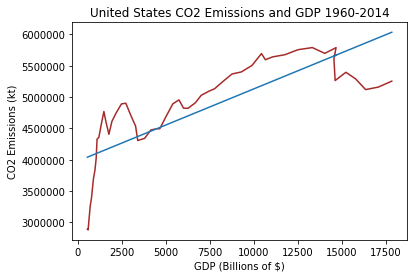

Score: 0.6186710286154812


In [794]:
n = 1

ply_x = np.concatenate([gdpco2["GDP"]**ex for ex in range(1, n+1)], axis = 0)
poly_model = LinearRegression().fit(ply_x[-55:].reshape(-1, 1), gdpco2["EMISSIONS"])
plt.plot(gdpco2["GDP"], gdpco2["EMISSIONS"], color = "brown")
plt.title("United States CO2 Emissions and GDP 1960-2014")
plt.xlabel("GDP (Billions of $)")
plt.ylabel("CO2 Emissions (kt)")
plt.plot(gdpco2["GDP"], poly_model.predict(ply_x[-55:].reshape(-1, 1)))
plt.show()
print("Score:", poly_model.score(ply_x[-55:].reshape(-1, 1), gdpco2["EMISSIONS"],))

The linear model visually fits the plot well and the r^2 value is high. It would be safe to assume that an increase in GDP has a strong relationship with an increase in CO2 levels. 

# Conclusion

My hypothesis about an increase in GDP correlating to an increase in CO2 emissions for the United States was correct. However, I was wrong that lower oil prices would lead to an increase in CO2 emissions. CO2 emissions appear to follow the GDP/output of the United States. This can be seen in the graph comparing them between 1960 to 2014 and also in the smaller graph depicting the Great Recession: where GDP fell and so did emissions. The Spearman/rank correlation would be the best way to check correlation between GDP and CO2 emissions because GDP in the last century has increased exponentially, not linearly. This gave us a rank correlation of 0.91. This is a very strong correlation. While correlation does not imply causation, there is a relationship between CO2 emissions and the US GDP. The United States is not the only country in the world but it is the 2nd largest emitter of CO2. This impacts the world immensely because CO2 causes Greenhouse Effects which in turn warms up the Earth and alters the climate. GDP may be a good indicator of CO2 levels but it does not have to be. Most of the CO2 is coming from industries and transportation. Clean industries and transportation can reduce CO2 levels while simultaneously increasing the GDP. Basically, GDP/output increase is not the cause of higher CO2 emissions but rather the industries and increased transportation associated with an increase in a country’s output. There is a relationship but the GDP is not the cause of higher CO2 emissions. I am confident in my data because as you can see from testing randomized datasets, this data is not random or by chance. There is indeed a strong relationship between output and CO2 levels, while there is not one between oil prices and emissions. 



## Acknowledgments

I would like to acknowledge Stack Overflow. There were many little things and errors that I could not figure out by myself. However, Stack Overflow had the right answers. I was especially stuck on creating small Dataframes from a larger one with random variables. This post -> https://stackoverflow.com/questions/54730276/how-to-randomly-split-a-dataframe-into-several-smaller-dataframes helped me greatly. I would also like to thank Professor Mimno for his lecture recordings which were very helpful. 